In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('CFB2019.csv')
df.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,29:59,3,11,17,28,4,6,10,18,1.38
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,31:19,7,10,14,24,3,6,9,15,1.07
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,27:24,89,4,11,15,6,12,18,-3,-0.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 146 entries, Team to Avg Turnover Margin per Game
dtypes: float64(29), int64(113), object(4)
memory usage: 148.4+ KB


In [4]:
dfn = df['Win-Loss'].str.split('-', expand=True)

In [5]:
dfn

,0,1
0,11,2
1,0,12
2,11,2
3,13,1
4,4,8
...,...,...
125,5,7
126,9,4
127,7,6
128,10,4


In [6]:
df['Win'] = dfn[0]
df['Loss'] = dfn[1]

In [7]:
df.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win,Loss
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,9,7,16,12,6,18,-2,-0.15,11,2
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,6,5,11,12,14,26,-15,-1.25,0,12
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,11,17,28,4,6,10,18,1.38,11,2
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,10,14,24,3,6,9,15,1.07,13,1
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,4,11,15,6,12,18,-3,-0.25,4,8


In [8]:
df.drop(columns=['Win-Loss'], inplace=True)

In [9]:
df.head()

,Team,Games,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,...,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win,Loss
0,Air Force (Mountain West),13,51,881,5483,6.22,55,421.8,17,752,...,9,7,16,12,6,18,-2,-0.15,11,2
1,Akron (MAC),12,130,725,2918,4.02,14,243.2,83,871,...,6,5,11,12,14,26,-15,-1.25,0,12
2,Alabama (SEC),13,6,842,6640,7.89,76,510.8,20,877,...,11,17,28,4,6,10,18,1.38,11,2
3,Appalachian St. (Sun Belt),14,39,969,6064,6.26,65,433.1,26,940,...,10,14,24,3,6,9,15,1.07,13,1
4,Arizona (Pac-12),12,30,873,5281,6.05,42,440.1,120,889,...,4,11,15,6,12,18,-3,-0.25,4,8


In [11]:
team = df['Team']
team.head()

0     Air Force (Mountain West)
1                   Akron (MAC)
2                 Alabama (SEC)
3    Appalachian St. (Sun Belt)
4              Arizona (Pac-12)
Name: Team, dtype: object

In [32]:
type(team)

pandas.core.frame.DataFrame

In [13]:
df[['Win']] = df[['Win']]. apply(pd.to_numeric, errors='coerce')

In [15]:
df.dtypes

Team                             object
Games                             int64
Off Rank                          int64
Off Plays                         int64
Off Yards                         int64
                                 ...   
Turnovers Lost                    int64
Turnover Margin                   int64
Avg Turnover Margin per Game    float64
Win                               int64
Loss                             object
Length: 147, dtype: object

In [16]:
df_corr = df.corr()

In [17]:
df_corr

,Games,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,...,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win
Games,1.000000,-0.428834,0.723447,0.718944,0.546835,0.692083,0.482391,-0.547758,0.531203,-0.178491,...,-0.351819,0.198436,0.501139,0.498812,0.081529,-0.189599,-0.098361,0.374522,0.373135,0.867916
Off Rank,-0.428834,1.000000,-0.690523,-0.905437,-0.873236,-0.830671,-0.965303,0.045477,-0.380261,-0.117841,...,0.308987,-0.031026,-0.388771,-0.312263,-0.021580,0.234430,0.172833,-0.302050,-0.307953,-0.547510
Off Plays,0.723447,-0.690523,1.000000,0.816111,0.515047,0.710931,0.725735,-0.309555,0.517653,-0.033043,...,-0.358662,0.170164,0.517100,0.493675,0.048992,-0.147441,-0.085804,0.363652,0.364384,0.715855
Off Yards,0.718944,-0.905437,0.816111,1.000000,0.911832,0.931386,0.953635,-0.270537,0.477476,-0.011506,...,-0.377034,0.084929,0.492944,0.423642,0.025569,-0.259455,-0.190193,0.382880,0.384573,0.773413
Off Yards/Play,0.546835,-0.873236,0.515047,0.911832,1.000000,0.877672,0.918381,-0.185525,0.337854,0.000899,...,-0.321854,0.024240,0.374042,0.297022,0.003668,-0.290834,-0.229351,0.326770,0.331377,0.651545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interceptions Thrown.y,-0.189599,0.234430,-0.147441,-0.259455,-0.290834,-0.345286,-0.254674,0.307501,0.042685,0.299511,...,0.656928,-0.152233,-0.247438,-0.279263,-0.051138,1.000000,0.763694,-0.640202,-0.639891,-0.370948
Turnovers Lost,-0.098361,0.172833,-0.085804,-0.190193,-0.229351,-0.271778,-0.203087,0.167823,-0.025825,0.173010,...,0.786847,-0.110072,-0.313476,-0.303478,0.605680,0.763694,1.000000,-0.799050,-0.795431,-0.305809
Turnover Margin,0.374522,-0.302050,0.363652,0.382880,0.326770,0.466668,0.333572,-0.326729,0.273556,-0.218249,...,-0.974332,0.482081,0.692212,0.815402,-0.447025,-0.640202,-0.799050,1.000000,0.997951,0.545360
Avg Turnover Margin per Game,0.373135,-0.307953,0.364384,0.384573,0.331377,0.465112,0.338122,-0.322663,0.273457,-0.211483,...,-0.977622,0.483736,0.691192,0.815639,-0.441811,-0.639891,-0.795431,0.997951,1.000000,0.544279


In [18]:
df_corr['Win']

Games                           0.867916
Off Rank                       -0.547510
Off Plays                       0.715855
Off Yards                       0.773413
Off Yards/Play                  0.651545
                                  ...   
Interceptions Thrown.y         -0.370948
Turnovers Lost                 -0.305809
Turnover Margin                 0.545360
Avg Turnover Margin per Game    0.544279
Win                             1.000000
Name: Win, Length: 143, dtype: float64

In [19]:
df[['Loss']] = df[['Loss']]. apply(pd.to_numeric, errors='coerce')

In [20]:
df_corr = df.corr()

In [21]:
df_corr['Loss']['Off Plays']

-0.6768458423957542

In [22]:
df_corr_k = df.corr(method='kendall')

In [23]:
df_corr_k['Win']

Games                           0.786640
Off Rank                       -0.381265
Off Plays                       0.521522
Off Yards                       0.565604
Off Yards/Play                  0.434372
                                  ...   
Turnovers Lost                 -0.223796
Turnover Margin                 0.374587
Avg Turnover Margin per Game    0.374600
Win                             1.000000
Loss                           -0.970291
Name: Win, Length: 144, dtype: float64

In [34]:
df_corr[df_corr['Win'] > 0.70]['Win']

Games               0.867916
Off Plays           0.715855
Off Yards           0.773413
Off TDs             0.774386
First Downs         0.765177
Redzone Attempts    0.733191
Redzone Scores      0.771868
Touchdowns          0.800132
PAT                 0.811616
Total Points        0.836112
Points Per Game     0.763336
Win                 1.000000
Name: Win, dtype: float64

<AxesSubplot:>

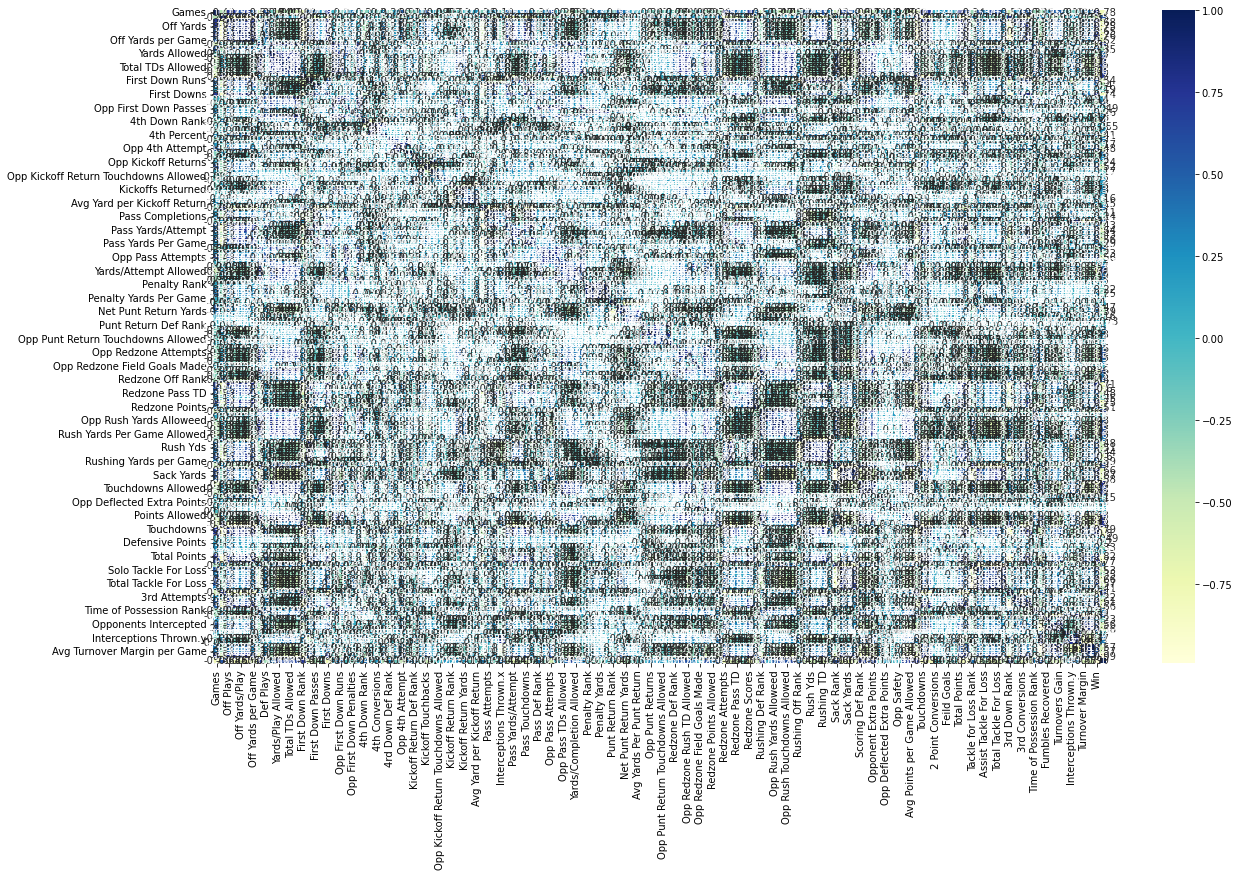

In [27]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_corr, cmap='YlGnBu', annot=True)

<AxesSubplot:>

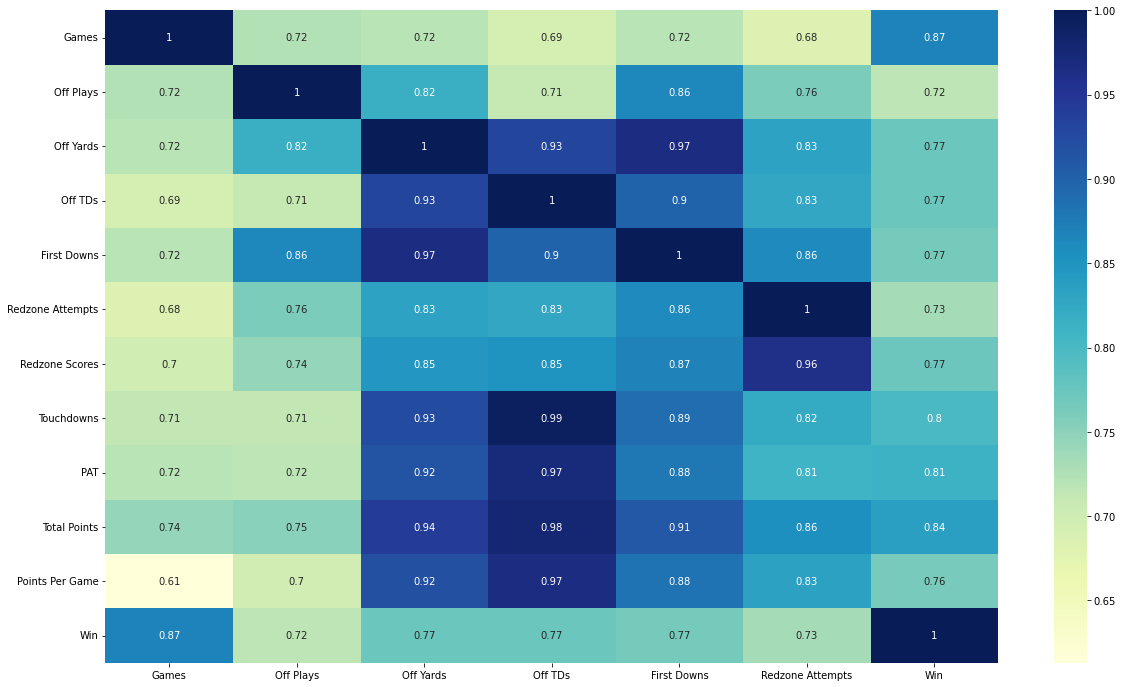

In [28]:
df_n = df_corr[df_corr['Win'] > 0.70][['Games', 'Off Plays', 'Off Yards', 'Off TDs', 'First Downs', 'Redzone Attempts', 'Win']]
plt.figure(figsize=(20, 12))
sns.heatmap(df_n, cmap='YlGnBu', annot=True)

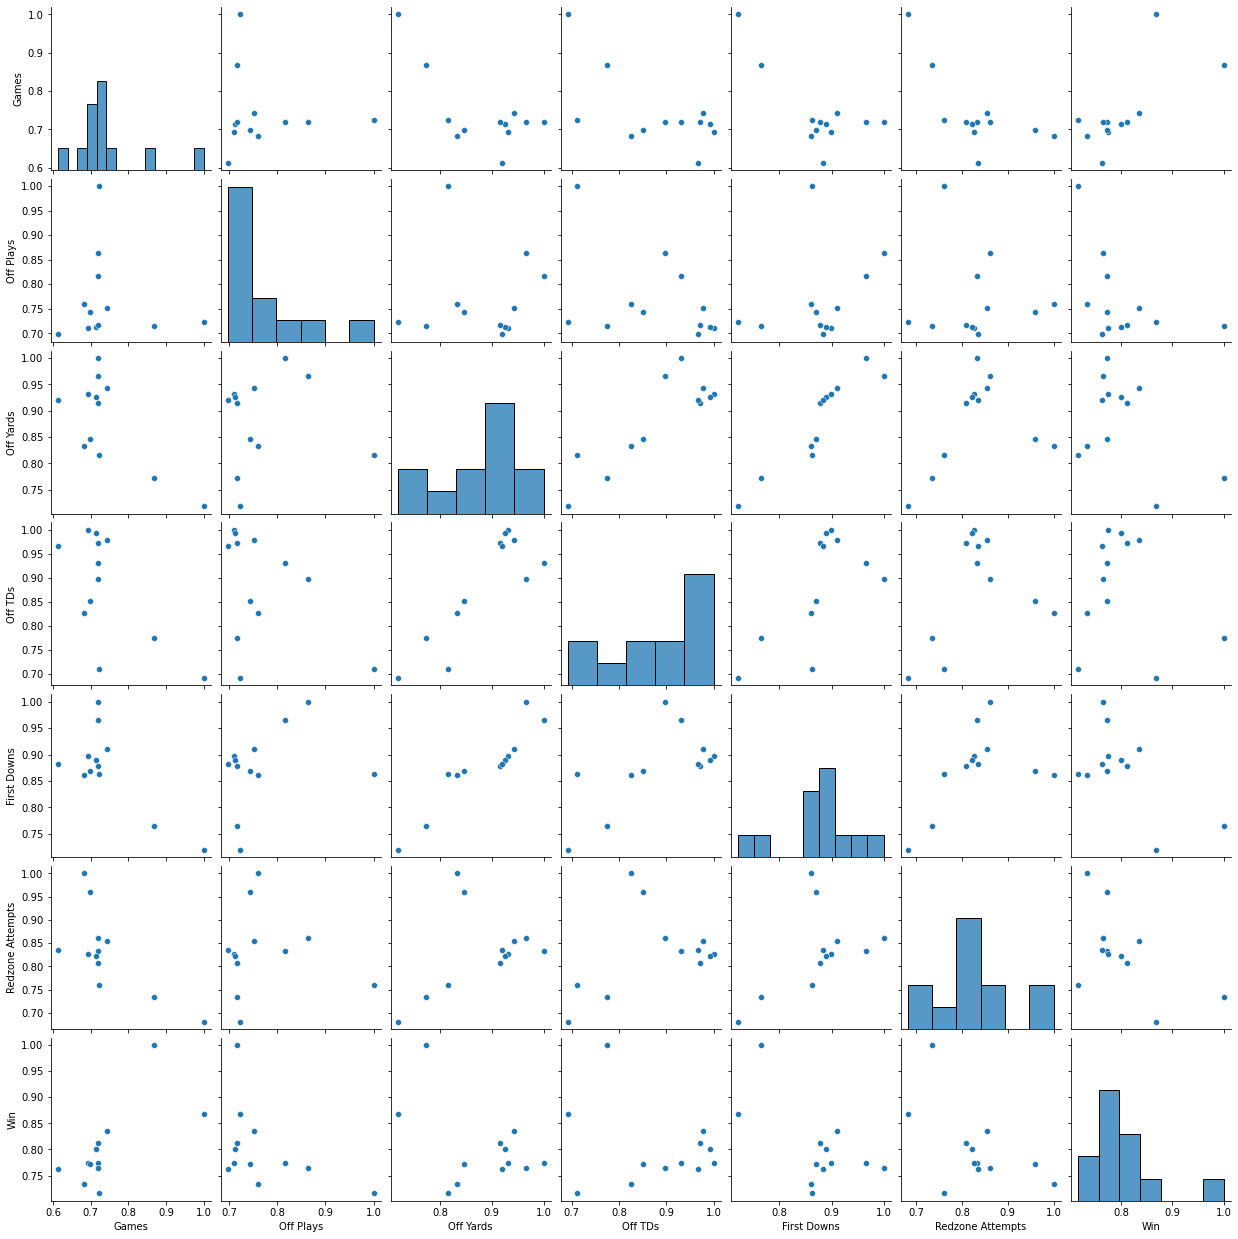

In [29]:
sns.pairplot(df_n)